## Intro
The idea of this notebook is to reproduce the drakos+taylor+benson2017 method of creating a truncated NFW halo via energy trunctaion. 
I unfortunantly cannot reproduce their results as my energy truncations do not remove many particles at all. 


In [2]:
using LilGuys
using CairoMakie
using Agama

In [3]:
readdir("../agama/halos")

17-element Vector{String}:
 "halo.toml"
 "halo_asy.toml"
 "nfw_1e4.hdf5"
 "nfw_1e4.toml"
 "nfw_1e4_t20.0_xi3.0.hdf5"
 "nfw_1e4_t20.0_xi3.0.toml"
 "nfw_1e5.hdf5"
 "nfw_1e5.toml"
 "nfw_1e5_t20.0_xi3.0.hdf5"
 "nfw_1e5_t20.0_xi3.0.toml"
 "nfw_1e6.hdf5"
 "nfw_1e6.toml"
 "nfw_1e6_t20.0_xi3.0.hdf5"
 "nfw_1e6_t20.0_xi3.0.toml"
 "nfw_1e7.toml"
 "nfw_1e7_t20.0_xi3.0.hdf5"
 "nfw_1e7_t20.0_xi3.0.toml"

In [4]:
#snap = LilGuys.Snapshot("../simulations/isolation/1e7/fiducial/out/snapshot_118.hdf5")
snap = LilGuys.Snapshot("../agama/halos/nfw_1e6.hdf5")

<snapshot with 1000000 particles>

In [5]:
using Logging
debuglogger = ConsoleLogger(stderr, Logging.Debug)
Logging.global_logger(debuglogger)

ConsoleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(54) open, 0 bytes waiting))), Info, Base.CoreLogging.default_metafmt, true, 0, Dict{Any, Int64}())

In [17]:
prof = LilGuys.DensityProfile(snap, filt_bound=false)


sigmas, betas = LilGuys.β_prof(snap, r_bins=10 .^ prof.log_r_bins)

[ Info: Using default bins of size = 334


([NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, 0.00113132227632872, 0.0008170596592484818, NaN, NaN, NaN, NaN, NaN, NaN], [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, -0.5740943801214031, -0.8856195365012973, NaN, NaN, NaN, NaN, NaN, NaN])

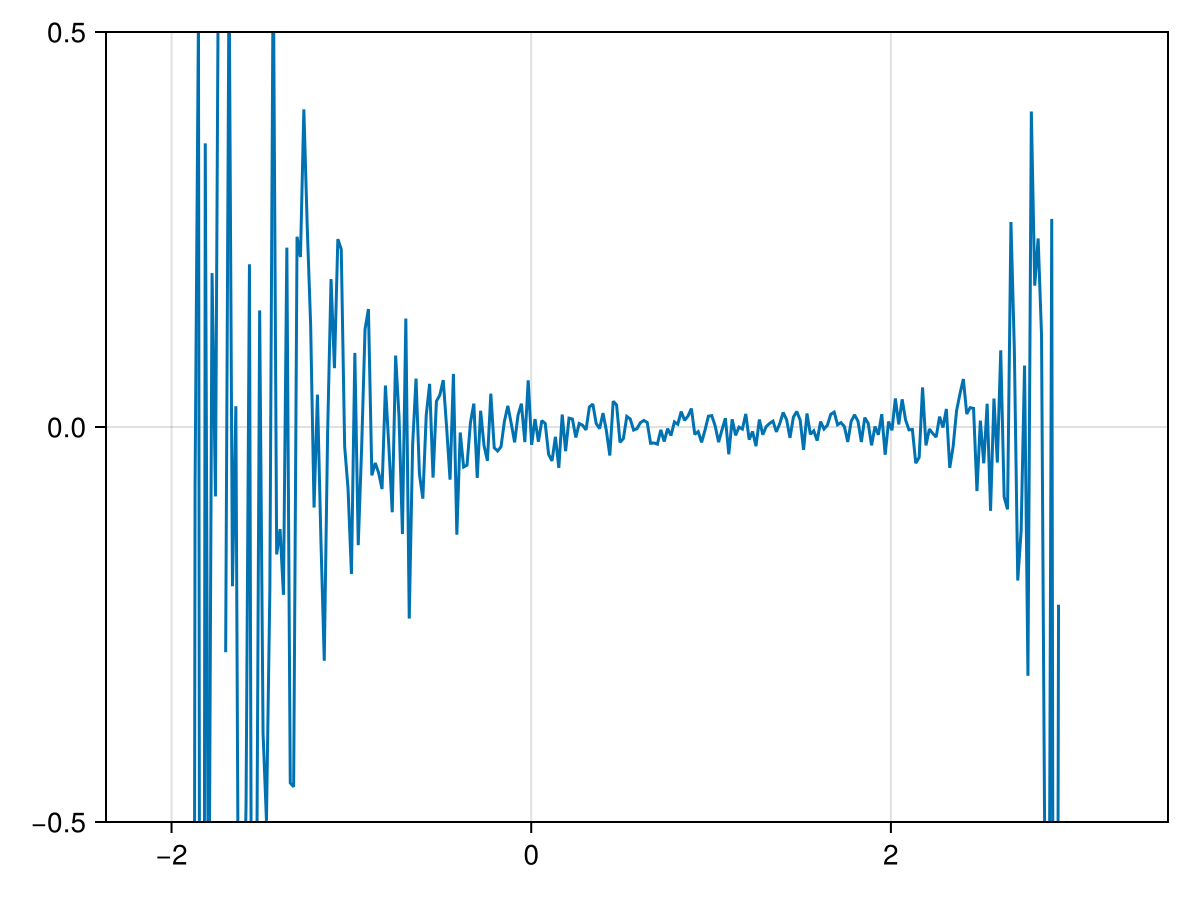

┌ Debug: Write PNG info:
│   png_ptr = Ptr{Nothing} @0x000000000464d980
│   height = 900
│   width = 1200
│   bit_depth = 8
│   color_type = 6
│   filters = 128
│   compression_level = 1
│   compression_strategy = 3
│   palette = nothing
│   typeof(image) = Matrix{ARGB32} (alias for Array{ColorTypes.ARGB32, 2})
└ @ PNGFiles /cosma/apps/durham/dc-boye1/.julia/packages/PNGFiles/xJpCU/src/io.jl:498
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMa

In [21]:
f = lines(prof.log_r, betas)

ylims!(-0.5, 0.5)
f

In [124]:
prof_ini = LilGuys.DensityProfile(snap, filt_bound=false)

[ Info: Using default bins of size = 334


DensityProfile([-2.889889853995314, -2.870987098781946, -2.8520843435685777, -2.8331815883552096, -2.8142788331418416, -2.7953760779284735, -2.7764733227151055, -2.7575705675017375, -2.7386678122883694, -2.719765057075001  …  3.215700079922589, 3.234602835135957, 3.2535055903493255, 3.272408345562694, 3.291311100776062, 3.31021385598943, 3.329116611202798, 3.348019366416166, 3.366922121629534, 3.3858248768429022], [-2.899341231601998, -2.88043847638863, -2.861535721175262, -2.8426329659618936, -2.8237302107485256, -2.8048274555351576, -2.7859247003217895, -2.7670219451084215, -2.7481191898950534, -2.729216434681685  …  3.225151457529273, 3.244054212742641, 3.26295696795601, 3.281859723169378, 3.300762478382746, 3.319665233596114, 3.338567988809482, 3.35747074402285, 3.376373499236218, 3.3952762544495863], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 0, 2, 2, 1, 0, 0, 0, 0, 1], Float64[], Measurement{Float64}[Measurement{Float64}(2661.7544387389826, 2661.7544387389826, 2661.7544387389826, ""), 

In [125]:
# concentration of 10

In [141]:
snap_trunc = snap[radii(snap) .< 10]

<snapshot with 458208 particles>

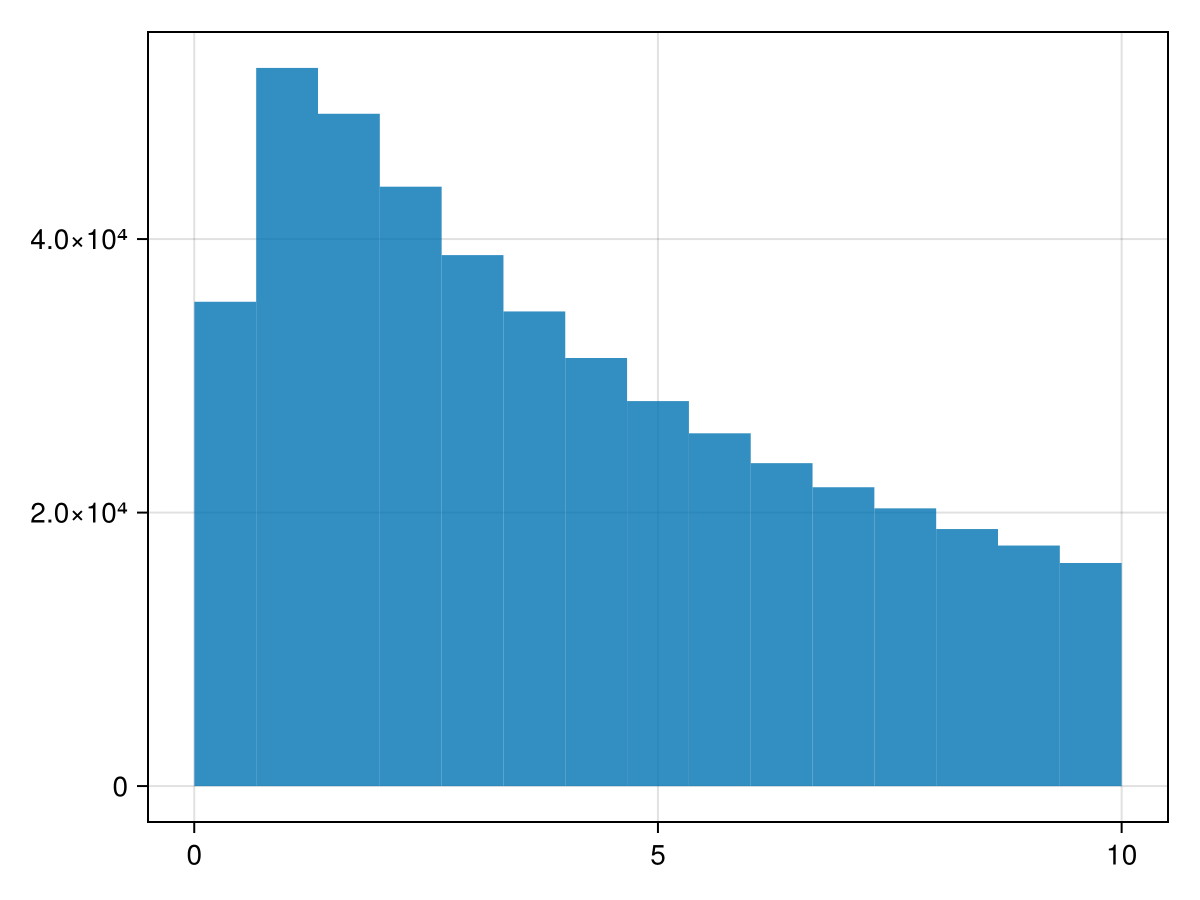

┌ Debug: Write PNG info:
│   png_ptr = Ptr{Nothing} @0x000000003ad8bab0
│   height = 900
│   width = 1200
│   bit_depth = 8
│   color_type = 6
│   filters = 128
│   compression_level = 1
│   compression_strategy = 3
│   palette = nothing
│   typeof(image) = Matrix{ARGB32} (alias for Array{ColorTypes.ARGB32, 2})
└ @ PNGFiles /cosma/apps/durham/dc-boye1/.julia/packages/PNGFiles/xJpCU/src/io.jl:498
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMa

In [142]:
hist(radii(snap_trunc))

In [143]:
prof_bound = LilGuys.DensityProfile(snap_trunc, filt_bound=:recursive_1D)

┌ Debug: bound particles iteration 0, dutting 3179 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:267
┌ Debug: bound particles iteration 1, dutting 203 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:267
┌ Debug: bound particles iteration 2, dutting 16 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:267
┌ Debug: bound particles iteration 3, dutting 1 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:267
[ Info: Using default bins of size = 270


DensityProfile([-2.889889853995314, -2.875365242327386, -2.8608406306594576, -2.846316018991529, -2.8317914073236006, -2.8172667956556725, -2.802742183987744, -2.788217572319816, -2.7736929606518874, -2.759168348983959  …  0.871984567998132, 0.8865091796660602, 0.9010337913339885, 0.915558403001917, 0.9300830146698453, 0.9446076263377736, 0.9591322380057021, 0.9736568496736304, 0.9881814613415587, 1.0027060730094872], [-2.8971521598292784, -2.88262754816135, -2.868102936493422, -2.8535783248254933, -2.839053713157565, -2.8245291014896368, -2.8100044898217083, -2.7954798781537797, -2.7809552664858517, -2.766430654817923  …  0.8792468738320962, 0.8937714855000243, 0.9082960971679528, 0.9228207088358813, 0.9373453205038094, 0.9518699321717379, 0.9663945438396664, 0.9809191555075945, 0.995443767175523, 1.0099683788434515], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  7606, 7667, 7622, 7713, 7679, 7710, 7769, 7661, 7621, 2412], Float64[], Measurement{Float64}[Measurement{Float64}(3465.0930982881487, 3

In [144]:
filt_3

LoadError: UndefVarError: `filt_3` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [145]:
filt_1 = LilGuys.bound_particles(snap_trunc, method=:recursive_1D)
println(sum(.!filt_1))
println(sum(.!filt_1) / length(filt_1))
snap_1 = snap_trunc[filt_1]

filt_2 = LilGuys.bound_particles(snap_1, method=:recursive_1D)
println(sum(.!filt_2))


┌ Debug: bound particles iteration 0, dutting 3179 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:267
┌ Debug: bound particles iteration 1, dutting 203 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:267


3399


┌ Debug: bound particles iteration 2, dutting 16 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:267
┌ Debug: bound particles iteration 3, dutting 1 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:267


0.007418028493609889
0


┌ Debug: bound particles iteration 0, dutting 0 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:267


In [146]:
prof_bound = LilGuys.DensityProfile(snap_1, filt_bound=false)

[ Info: Using default bins of size = 270


DensityProfile([-2.889889853995314, -2.875365242327386, -2.8608406306594576, -2.846316018991529, -2.8317914073236006, -2.8172667956556725, -2.802742183987744, -2.788217572319816, -2.7736929606518874, -2.759168348983959  …  0.871984567998132, 0.8865091796660602, 0.9010337913339885, 0.915558403001917, 0.9300830146698453, 0.9446076263377736, 0.9591322380057021, 0.9736568496736304, 0.9881814613415587, 1.0027060730094872], [-2.8971521598292784, -2.88262754816135, -2.868102936493422, -2.8535783248254933, -2.839053713157565, -2.8245291014896368, -2.8100044898217083, -2.7954798781537797, -2.7809552664858517, -2.766430654817923  …  0.8792468738320962, 0.8937714855000243, 0.9082960971679528, 0.9228207088358813, 0.9373453205038094, 0.9518699321717379, 0.9663945438396664, 0.9809191555075945, 0.995443767175523, 1.0099683788434515], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  7606, 7667, 7622, 7713, 7679, 7710, 7769, 7661, 7621, 2412], Float64[], Measurement{Float64}[Measurement{Float64}(3465.0930982881487, 3

In [147]:
minimum(LilGuys.potential_spherical_discrete(snap[radii(snap) .> 10]))

-0.06470137562587557

In [148]:
maximum(snap_trunc.potential)

LoadError: MethodError: no method matching iterate(::Nothing)
The function `iterate` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  iterate([91m::CompositeException[39m, Any...)
[0m[90m   @[39m [90mBase[39m [90m[4mtask.jl:55[24m[39m
[0m  iterate([91m::Automa.Precondition[39m)
[0m[90m   @[39m [35mAutoma[39m [90m/cosma/apps/durham/dc-boye1/.julia/packages/Automa/EyNRt/src/[39m[90m[4mprecond.jl:87[24m[39m
[0m  iterate([91m::Automa.Precondition[39m, [91m::Any[39m)
[0m[90m   @[39m [35mAutoma[39m [90m/cosma/apps/durham/dc-boye1/.julia/packages/Automa/EyNRt/src/[39m[90m[4mprecond.jl:87[24m[39m
[0m  ...


In [149]:
hist(snap.potential .- LilGuys.potential_spherical_discrete(snap))

LoadError: MethodError: no method matching -(::Nothing, ::Float64)
The function `-` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  -([91m::ChainRulesCore.ZeroTangent[39m, ::Any)
[0m[90m   @[39m [35mChainRulesCore[39m [90m/cosma/apps/durham/dc-boye1/.julia/packages/ChainRulesCore/XAgYn/src/[39m[90m[4mtangent_arithmetic.jl:101[24m[39m
[0m  -(::Any, [91m::ChainRulesCore.NotImplemented[39m)
[0m[90m   @[39m [35mChainRulesCore[39m [90m/cosma/apps/durham/dc-boye1/.julia/packages/ChainRulesCore/XAgYn/src/[39m[90m[4mtangent_arithmetic.jl:50[24m[39m
[0m  -([91m::ChainRulesCore.NotImplemented[39m, ::Any)
[0m[90m   @[39m [35mChainRulesCore[39m [90m/cosma/apps/durham/dc-boye1/.julia/packages/ChainRulesCore/XAgYn/src/[39m[90m[4mtangent_arithmetic.jl:49[24m[39m
[0m  ...


In [150]:
hist(snap_trunc.potential .- LilGuys.potential_spherical_discrete(snap_trunc))

LoadError: MethodError: no method matching -(::Nothing, ::Float64)
The function `-` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  -([91m::ChainRulesCore.ZeroTangent[39m, ::Any)
[0m[90m   @[39m [35mChainRulesCore[39m [90m/cosma/apps/durham/dc-boye1/.julia/packages/ChainRulesCore/XAgYn/src/[39m[90m[4mtangent_arithmetic.jl:101[24m[39m
[0m  -(::Any, [91m::ChainRulesCore.NotImplemented[39m)
[0m[90m   @[39m [35mChainRulesCore[39m [90m/cosma/apps/durham/dc-boye1/.julia/packages/ChainRulesCore/XAgYn/src/[39m[90m[4mtangent_arithmetic.jl:50[24m[39m
[0m  -([91m::ChainRulesCore.NotImplemented[39m, ::Any)
[0m[90m   @[39m [35mChainRulesCore[39m [90m/cosma/apps/durham/dc-boye1/.julia/packages/ChainRulesCore/XAgYn/src/[39m[90m[4mtangent_arithmetic.jl:49[24m[39m
[0m  ...


┌ Debug: Write PNG info:
│   png_ptr = Ptr{Nothing} @0x000000003ad8bab0
│   height = 900
│   width = 1200
│   bit_depth = 8
│   color_type = 6
│   filters = 128
│   compression_level = 1
│   compression_strategy = 3
│   palette = nothing
│   typeof(image) = Matrix{ARGB32} (alias for Array{ColorTypes.ARGB32, 2})
└ @ PNGFiles /cosma/apps/durham/dc-boye1/.julia/packages/PNGFiles/xJpCU/src/io.jl:498
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507


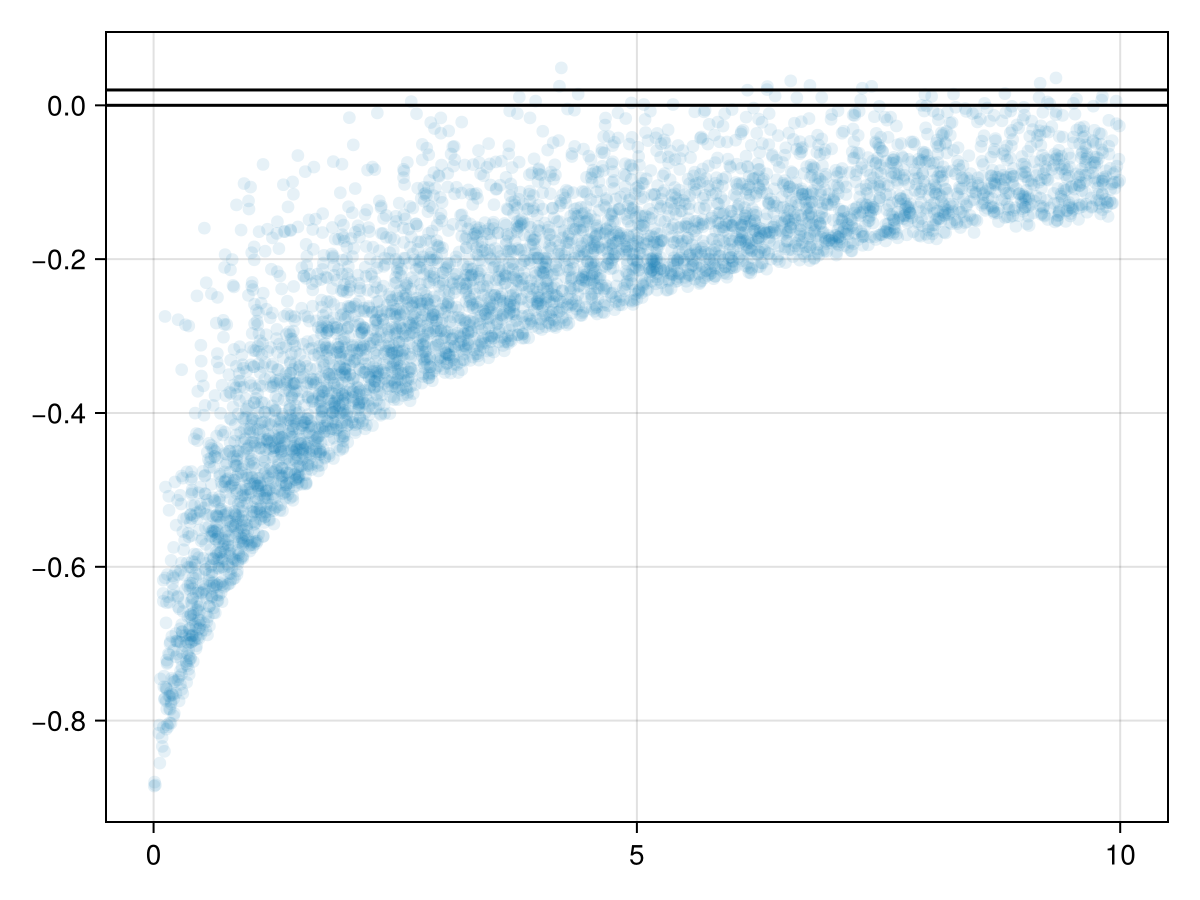

┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Write PNG info:
│   png_ptr = Ptr{Nothing} @0x000000003ad8bab0
│   height = 900
│   width = 1200
│   bit_depth = 8
│   color_type = 6
│   filters = 128
│   compression_level = 1
│   compression_strategy = 3
│   palette = nothing
│   typeof(image) = Matrix{ARGB32} (alias for Array{ColorTypes.ARGB32, 2})
└ @ PNGFiles /cosma/apps/durham/dc-boye1/.julia/packages/PNGFiles/xJpCU/src/io.jl:498


In [151]:
filt = 1:100:length(snap_trunc)
epsilon = 1/2 * LilGuys.radii(snap_trunc.velocities) .^ 2 .+ LilGuys.potential_spherical_discrete(snap_trunc)

fap = scatter(radii(snap_trunc)[filt], epsilon[filt], alpha=0.1)

hlines!(0, color=:black)
hlines!(0.02, color=:black)

fap

In [152]:
sum(epsilon .> 0)

3179

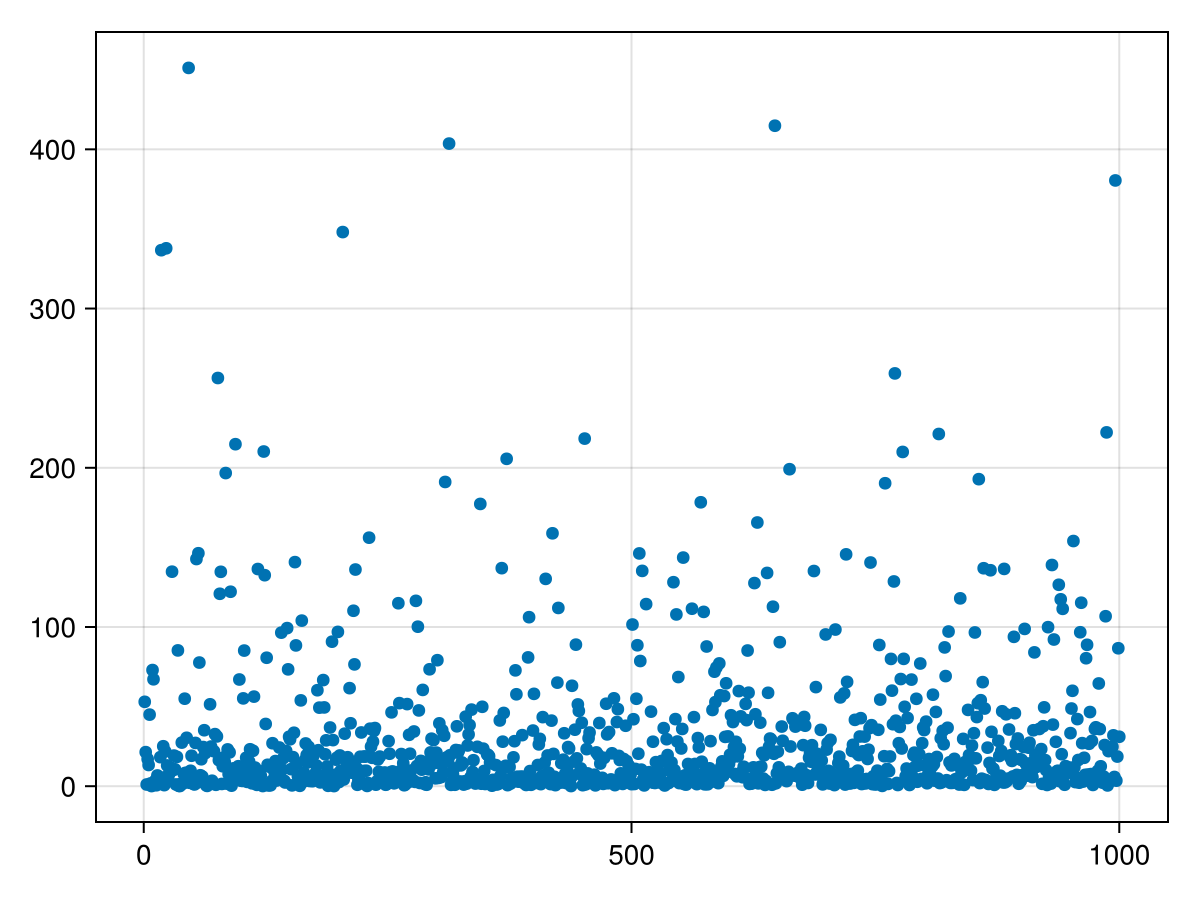

┌ Debug: Write PNG info:
│   png_ptr = Ptr{Nothing} @0x000000003ad8bab0
│   height = 900
│   width = 1200
│   bit_depth = 8
│   color_type = 6
│   filters = 128
│   compression_level = 1
│   compression_strategy = 3
│   palette = nothing
│   typeof(image) = Matrix{ARGB32} (alias for Array{ColorTypes.ARGB32, 2})
└ @ PNGFiles /cosma/apps/durham/dc-boye1/.julia/packages/PNGFiles/xJpCU/src/io.jl:498
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMa

In [153]:
scatter(radii(snap)[1:1000:end], rasterize=true)

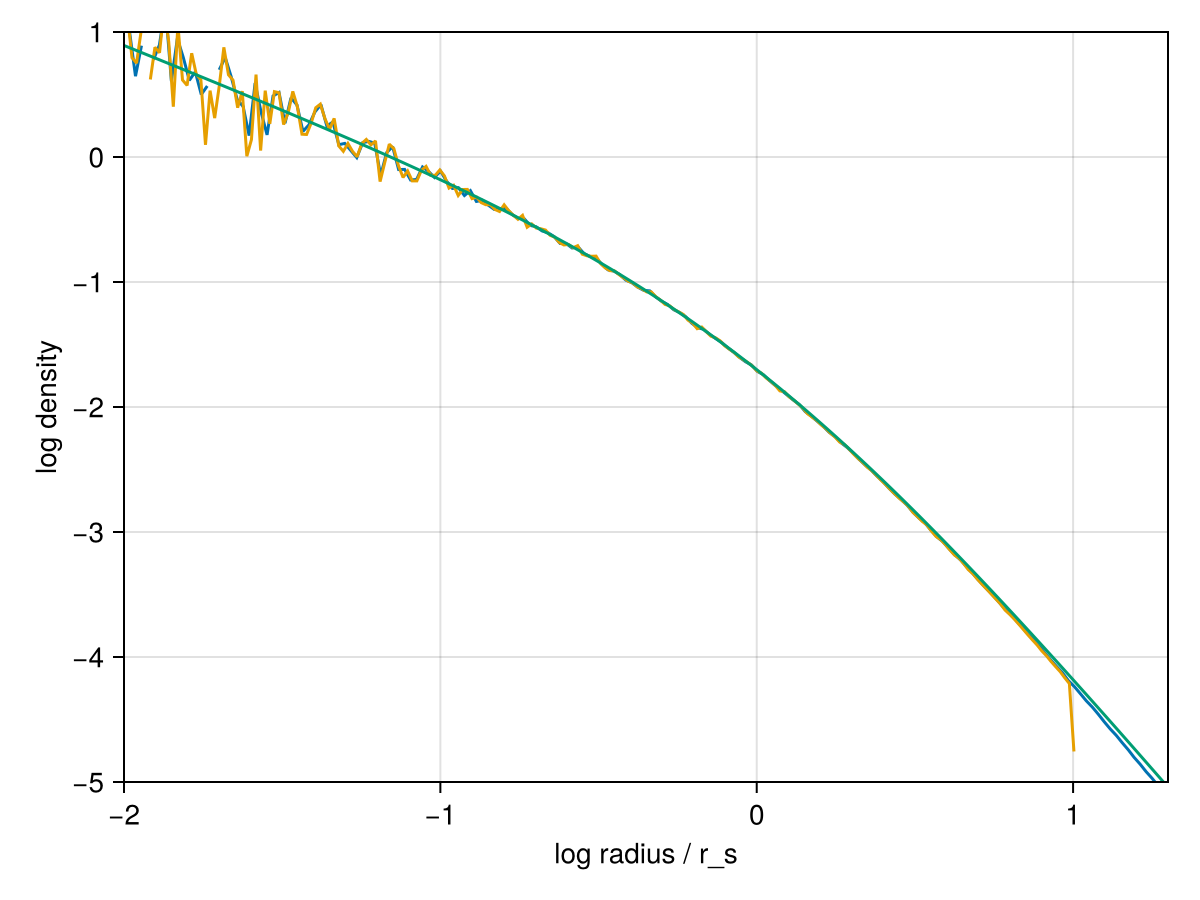

┌ Debug: Write PNG info:
│   png_ptr = Ptr{Nothing} @0x000000003ad8bab0
│   height = 900
│   width = 1200
│   bit_depth = 8
│   color_type = 6
│   filters = 128
│   compression_level = 1
│   compression_strategy = 3
│   palette = nothing
│   typeof(image) = Matrix{ARGB32} (alias for Array{ColorTypes.ARGB32, 2})
└ @ PNGFiles /cosma/apps/durham/dc-boye1/.julia/packages/PNGFiles/xJpCU/src/io.jl:498
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMakie.IMAGE}
└ @ Makie /cosma/apps/durham/dc-boye1/.julia/packages/Makie/UjJJY/src/scenes.jl:507
┌ Debug: Deleting scenes not implemented for backend: CairoMakie.Screen{CairoMa

In [154]:
let
    fig = Figure()
    ax = Axis(fig[1,1], 
    limits=(-2, 1.3, -5, 1,),
        xlabel = "log radius / r_s",
        ylabel = "log density"
        )
    

    lines!(LilGuys.log_radii(prof_ini), middle.(LilGuys.log_densities(prof_ini)))
    lines!(LilGuys.log_radii(prof_bound), middle.(LilGuys.log_densities(prof_bound)))

    x = LinRange(-2, 1.3, 1000)
    r = 10 .^ x

    lines!(x, log10.(LilGuys.density.(LilGuys.NFW(r_s=1, M_s=1), r)))
    
    fig
end

# Only run if N < 1e5

In [ ]:
i

In [27]:
bound_3 = LilGuys.bound_particles(snap_1, method=:nbody)

22432-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [28]:
sum(.!bound_3)

88

In [29]:
bound_4 = LilGuys.bound_particles(snap_trunc, method=:recursive_3D)

┌ Debug: bound particles iteration 1, dutting 98 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:320
┌ Debug: bound particles iteration 2, dutting 17 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:320
┌ Debug: bound particles iteration 3, dutting 1 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:320
┌ Debug: bound particles iteration 4, dutting 0 particles
└ @ LilGuys ~/LilGuys.jl/src/physics.jl:320


23328-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 0
 1
 1
 1
 1
 1
 1
 1
 1

In [40]:
sum(bound_4 .!= filt_1)

247

In [41]:
sum(bound_4) / sum(filt_1)

1.003432596291013